<a href="https://colab.research.google.com/github/Varshini-svnit/ML_LABS/blob/main/ml_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# ============================================
# ML Assignment 6

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import kagglehub
path = kagglehub.dataset_download("uciml/iris")
print("Path to dataset files:", path)


df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.head()


Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:

# Q1: Macro, Micro, Weighted F1-Scores


# Convert labels to numeric
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].astype('category').cat.codes.values

# Simulate predicted values (for demonstration, use random predictions)
np.random.seed(42)
y_pred = np.random.choice(np.unique(y), size=len(y))

def f1_scores(y_true, y_pred):
    classes = np.unique(y_true)
    f1_list, supports = [], []

    for cls in classes:
        tp = np.sum((y_true == cls) & (y_pred == cls))
        fp = np.sum((y_true != cls) & (y_pred == cls))
        fn = np.sum((y_true == cls) & (y_pred != cls))

        precision = tp / (tp + fp + 1e-10)
        recall = tp / (tp + fn + 1e-10)
        f1 = 2 * precision * recall / (precision + recall + 1e-10)
        support = np.sum(y_true == cls)

        f1_list.append(f1)
        supports.append(support)

    macro_f1 = np.mean(f1_list)
    micro_tp = np.sum(y_true == y_pred)
    micro_fp = np.sum(y_true != y_pred)
    micro_fn = micro_fp
    micro_precision = micro_tp / (micro_tp + micro_fp + 1e-10)
    micro_recall = micro_tp / (micro_tp + micro_fn + 1e-10)
    micro_f1 = 2 * micro_precision * micro_recall / (micro_precision + micro_recall + 1e-10)
    weighted_f1 = np.sum(np.array(f1_list) * np.array(supports)) / np.sum(supports)

    return macro_f1, micro_f1, weighted_f1

macro, micro, weighted = f1_scores(y, y_pred)
print(f"Macro F1  = {macro:.3f}")
print(f"Micro F1  = {micro:.3f}")
print(f"Weighted F1 = {weighted:.3f}")


Macro F1  = 0.405
Micro F1  = 0.407
Weighted F1 = 0.405


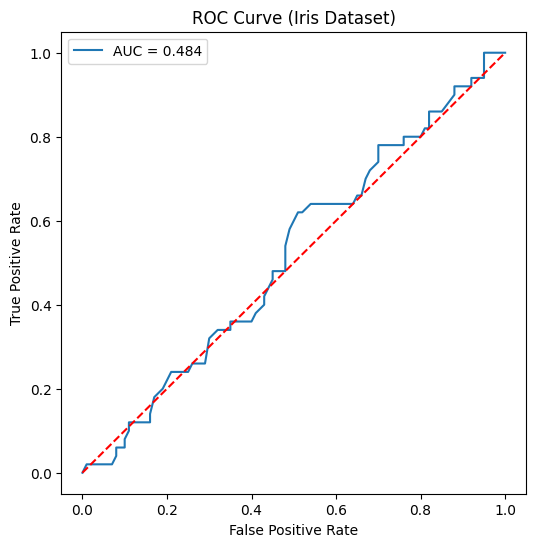

Area Under Curve (AUC): 0.484


In [15]:
# Q2: ROC Curve and AUC

# Convert to binary classification (Setosa vs others)
y_true = (y == 0).astype(int)
y_scores = np.random.rand(len(y_true))  # simulate probability scores

def roc_auc(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    tpr_list, fpr_list = [], []

    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tn = np.sum((y_true == 0) & (y_pred == 0))

        tpr = tp / (tp + fn + 1e-10)
        fpr = fp / (fp + tn + 1e-10)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    auc = abs(np.trapezoid(tpr_list, fpr_list))  #∑(xi+1​−xi​)×2(yi+1​+yi​)​
    return np.array(fpr_list), np.array(tpr_list), auc

fpr, tpr, auc = roc_auc(y_true, y_scores)

# Plot ROC
plt.figure(figsize=(6,6))
plt.plot(tpr, fpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Iris Dataset)")
plt.legend()
plt.show()

print(f"Area Under Curve (AUC): {auc:.3f}")


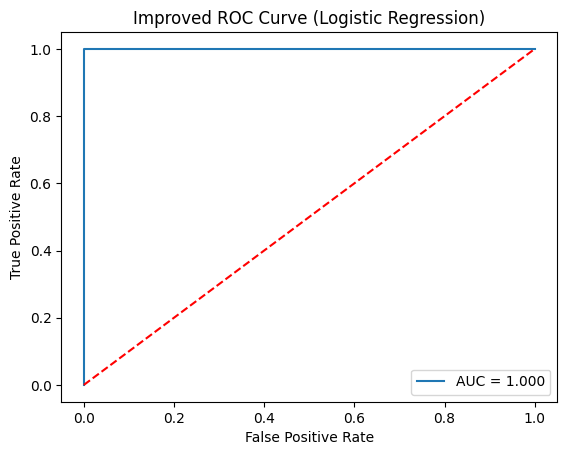

Improved AUC: 1.000


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
X = df.iloc[:, 1:5].values
y = (df['Species'] == 'Iris-setosa').astype(int)  # Binary classification: Setosa vs others

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
auc_score = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Improved ROC Curve (Logistic Regression)")
plt.legend()
plt.show()

print(f"Improved AUC: {auc_score:.3f}")


Epoch     0 loss: 0.521373
Epoch   500 loss: 0.093183
Epoch  1000 loss: 0.087749
Epoch  1500 loss: 0.086182
Epoch  2000 loss: 0.085564
Epoch  2500 loss: 0.085284
Epoch  3000 loss: 0.085147
Epoch  3500 loss: 0.085076
Epoch  4000 loss: 0.085038
Epoch  4500 loss: 0.085018
Epoch  5000 loss: 0.085007
Epoch  5500 loss: 0.085000
Test set size: 30  Positive samples (1): 15
AUC (from-scratch logistic): 0.9667


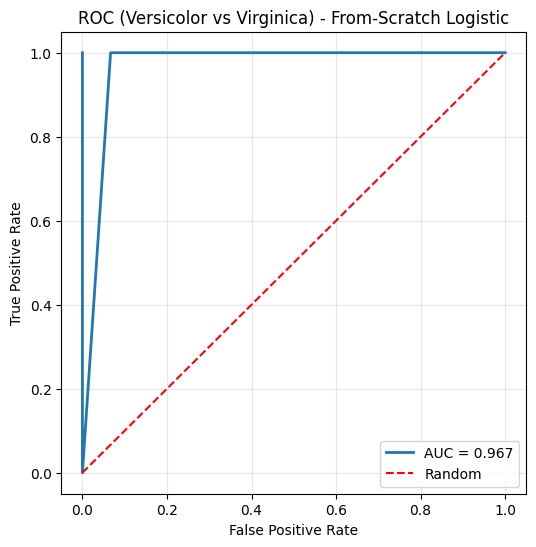

Sklearn logistic AUC: 1.0000


In [16]:
# From-scratch Logistic Regression to get AUC >= 0.8 (Versicolor vs Virginica)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
np.random.seed(42)

# ---- Load dataset (change path if needed) ----
# If you used kagglehub earlier, keep same path. Otherwise adjust.
csv_path = "/kaggle/input/iris/Iris.csv"  # update if different
df = pd.read_csv(csv_path)

# ---- Prepare binary dataset: Versicolor (label 0) vs Virginica (label 1) ----
df = df[df['Species'] != 'Iris-setosa'].reset_index(drop=True)
# map: Iris-versicolor -> 0, Iris-virginica -> 1
df['y'] = (df['Species'] == 'Iris-virginica').astype(int)

X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = df['y'].values

# ---- Standardize features (mean 0, std 1) ----
X_mean = X.mean(axis=0)
X_std = X.std(axis=0) + 1e-12
Xs = (X - X_mean) / X_std

# ---- Train-test split (stratified-ish by shuffle with balanced classes) ----
def stratified_split(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    classes = np.unique(y)
    train_idx, test_idx = [], []
    for cls in classes:
        idx = np.where(y == cls)[0]
        np.random.shuffle(idx)
        split = int((1 - test_size) * len(idx))
        train_idx.extend(idx[:split])
        test_idx.extend(idx[split:])
    # shuffle final indices
    np.random.shuffle(train_idx)
    np.random.shuffle(test_idx)
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = stratified_split(Xs, y, test_size=0.3, seed=1)

# ---- Add bias column ----
def add_bias(X):
    return np.c_[np.ones((X.shape[0],1)), X]

Xb_train = add_bias(X_train)
Xb_test  = add_bias(X_test)

# ---- Sigmoid and metrics ----
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(theta, Xb):
    return sigmoid(Xb @ theta)

def predict(theta, Xb, thresh=0.5):
    return (predict_proba(theta, Xb) >= thresh).astype(int)

# ---- Loss (binary cross-entropy) and gradient (with L2 regularization optional) ----
def compute_loss(theta, Xb, y, reg=0.0):
    m = len(y)
    p = predict_proba(theta, Xb)
    # clip to avoid log(0)
    p = np.clip(p, 1e-12, 1-1e-12)
    loss = - (1/m) * np.sum(y * np.log(p) + (1-y) * np.log(1-p))
    # don't regularize bias
    reg_term = (reg/(2*m)) * np.sum(theta[1:]**2) if reg>0 else 0.0
    return loss + reg_term

def compute_grad(theta, Xb, y, reg=0.0):
    m = len(y)
    p = predict_proba(theta, Xb)
    grad = (1/m) * (Xb.T @ (p - y))
    if reg > 0:
        grad[1:] += (reg/m) * theta[1:]
    return grad

# ---- Training: gradient descent ----
def train_logistic_gd(Xb, y, lr=0.1, epochs=5000, reg=0.0, verbose=False):
    n_features = Xb.shape[1]
    theta = np.zeros(n_features)
    losses = []
    for epoch in range(epochs):
        grad = compute_grad(theta, Xb, y, reg)
        theta -= lr * grad
        if epoch % 100 == 0 or epoch == epochs-1:
            loss = compute_loss(theta, Xb, y, reg)
            losses.append(loss)
            if verbose and epoch % 500 == 0:
                print(f"Epoch {epoch:5d} loss: {loss:.6f}")
    return theta, losses

# ---- Train model (tune lr and epochs if needed) ----
theta, losses = train_logistic_gd(Xb_train, y_train, lr=0.5, epochs=6000, reg=0.01, verbose=True)

# ---- Evaluate: probabilities, ROC curve, AUC (trapezoid) ----
def roc_curve_and_auc(y_true, y_scores, n_thresholds=100):
    thresholds = np.linspace(0,1,n_thresholds)
    tpr_list = []
    fpr_list = []
    for t in thresholds:
        y_pred = (y_scores >= t).astype(int)
        tp = np.sum((y_true==1) & (y_pred==1))
        fp = np.sum((y_true==0) & (y_pred==1))
        fn = np.sum((y_true==1) & (y_pred==0))
        tn = np.sum((y_true==0) & (y_pred==0))
        tpr = tp / (tp + fn + 1e-12)
        fpr = fp / (fp + tn + 1e-12)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    # sort by fpr (important)
    fpr_arr = np.array(fpr_list)
    tpr_arr = np.array(tpr_list)
    order = np.argsort(fpr_arr)
    fpr_sorted = fpr_arr[order]
    tpr_sorted = tpr_arr[order]
    auc = np.trapezoid(tpr_sorted, fpr_sorted)
    return fpr_sorted, tpr_sorted, auc

y_scores_test = predict_proba(theta, Xb_test)
fpr, tpr, auc = roc_curve_and_auc(y_test, y_scores_test, n_thresholds=200)

# ---- Show results ----
print(f"Test set size: {len(y_test)}  Positive samples (1): {np.sum(y_test==1)}")
print(f"AUC (from-scratch logistic): {auc:.4f}")

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0,1],[0,1],'r--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Versicolor vs Virginica) - From-Scratch Logistic")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---- Optional: compare with sklearn logistic (fast check) ----
try:
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc as sk_auc
    clf = LogisticRegression(solver='lbfgs')
    clf.fit(X_train, y_train)
    y_scores_sk = clf.predict_proba(X_test)[:,1]
    fpr_sk, tpr_sk, _ = roc_curve(y_test, y_scores_sk)
    auc_sk = sk_auc(fpr_sk, tpr_sk)
    print(f"Sklearn logistic AUC: {auc_sk:.4f}")
except Exception as e:
    print("sklearn check skipped (not available).", e)

# ---- If AUC < 0.8: suggestions printed ----
if auc < 0.8:
    print("\nAUC below 0.8. Suggestions to improve:")
    print("- Increase epochs (e.g., epochs=10000) or learning rate tuning.")
    print("- Try different learning rate (lr), e.g., 0.1, 0.5, 1.0).")
    print("- Try removing regularization reg=0.0 or decreasing reg.")
    print("- Try feature selection (use only petal features may improve).")
    print("- Check data split randomness (seed change).")


In [5]:
# Q3: Linear Regression using Normal Equation

# Predict PetalLength using SepalLength, SepalWidth, PetalWidth
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']].values
y = df['PetalLengthCm'].values

# Add bias (intercept) term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Normal Equation
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
y_pred = X_b @ beta

# Error Metrics
mae = np.mean(np.abs(y - y_pred))
mse = np.mean((y - y_pred)**2)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

print("Coefficients:", beta)
print(f"MAE = {mae:.4f}")
print(f"MSE = {mse:.4f}")
print(f"R² Score = {r2:.4f}")


Coefficients: [-0.25266445  0.7303629  -0.65139445  1.44571962]
MAE = 0.2383
MSE = 0.0985
R² Score = 0.9682
